# 4.2: Bayesian Inference applied to a lottery #

*Andrew Valentine & Malcolm Sambridge - Research School of Earth Sciences, The Australian National University - Last updated Sept. 2019*

In this practical, we will compare Bayesian and Frequentist approaches to using published data to estimate the number of tickets sold in a national lottery. The single unknown in the problem is the total number of entries (i.e. sets of 6 numbers) sold, which we will call $n$. The data is the number of
winning entries of each division $d_i, (i=1,\dots,N_{div}) $, where $N_{div}$ is
6 for the example below. These are given without error. Of
course, since both the cost per entry and the total prize money are
published then an estimate of $n$, allows a direct inference on the
total profit before costs made by the lotto organisation. (In reality
the real value of $n$ is never made public!)

We will look at the problem both from a Frequentist viewpoint, using the
data to make a single estimate of $n$, and also a Bayesian inference
viewpoint where we use the data to construct a probability distribution
for $n$.

### Background theory

The probability of winning each division, is independent of the total
number of entries $n$, so these may be treated as a set of known
constants, $p_i, (i=1,\dots, N_{div})$, the value of which depends on
the details of the game. 

<img src="Figures/table.png" alt="Bootstrap figure" width="600"/>

Table 1. $p_i$ is the probability of winning division $i$ and $d_i$ are the number of actual winners in division $i$. Australian Tattslotto dividend results for draw number 3253 on 29/09/2012. Total prize pool of \$49.92m, with division 1 prize of \$22m. The cost of a single entry is about \$0.65.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as mt
ds = [14.,169.,3059.,149721.,369543.,802016.]  # data for the lottery problem
pm1s = [8145060.,678756.,36696.,732.,300.,144.] # inverse probabilities for the lottery problem

**Task 1**  A Frequentist solution might be to take the number of winners of
    each division and divide by the probability of winning to get
    multiple estimates of $n$. These estimates are independent and we
    could average them. Do this for the data above to get an estimate
    for $n$. By how much do these estimates vary ?

In [2]:

xave = np.dot(ds,pm1s)/len(ds)
print(' Average of frequentist estimates of number of tickets = ',xave)
print(' Estimates of number of tickets = ',np.multiply(ds,pm1s))
print(' Range in estimates of number of tickets = ',np.min(np.multiply(ds,pm1s)),' to',np.max(np.multiply(ds,pm1s)))

 Average of frequentist estimates of number of tickets =  112823774.0
 Estimates of number of tickets =  [  1.14030840e+08   1.14709764e+08   1.12253064e+08   1.09595772e+08
   1.10862900e+08   1.15490304e+08]
 Range in estimates of number of tickets =  109595772.0  to 115490304.0


**Task 2**  A Bayesian inference approach requires us to find the Likelihood and
    prior and then multiply them together. Lets assume our prior is
    uniform between $1< n < 3\times 10^8$ which is a safe assumption.
    The likelihood is the probability of the data given the model, i.e.
    the probability that there would be $d_i$ winners of division $i$
    and $n - d_i$ non winners when there are $n$ tickets sold. The
    binomial theorem tells us that this probability, $p(d_i | n)$, is
    given by
$$p(d_i | n) = \frac{n!}{d_i! (n-d_i)!} \times p_i^{d_i} (1-p_i)^{n-d_i}$$

All values in this expression are known except the value of
    $n$. Since the number of winners in each division provides
    independent data, the total likelihood is the product of similar
    terms for each division, i.e.   
$$p({\bf d}| n) =\prod_{i=1}^{N_{div}} p(d_i | n)$$

Bayes’ theorem says that to find the <span>*a posteriori*</span>
    probability distribution for the unknown $n$ we just multiply the
    likelihood by the prior. Since the prior is a constant the result is
$$p(n | {\bf d}) \propto  \prod_{i=1}^{N_{div}} \frac{n!}{(n-d_i)!} \times (1-p_i)^{n-d_i}
       $$

which holds for $1 \le n \le 3\times 10^8$. Outside this range the
    posterior PDF is zero because the prior is zero. Our only interest
    is in the unknown $n$ and so the constant of proportionality is used
    to absorb all quantities independent of $n$.

Your task is to use the values of $(d_i, p_i), i=1,\dots, 6$ from
    the table and plot the posterior probability distribution as a function of
    $n$. Do this in the range 112.5m - 114.5m. Did you get the type of figure that you expected? 
    Compare this curve to the single frequentist estimate of $n$ you obtained in part 1, what do you
    notice?
    
[Hint: In any computer program it is always best to calculate $\log p(n | {\bf d})$ first and then take an exponent to evaluate the curve as a function of $n$. Stirling's formulae for the approximation to $n!$ may be useful.]


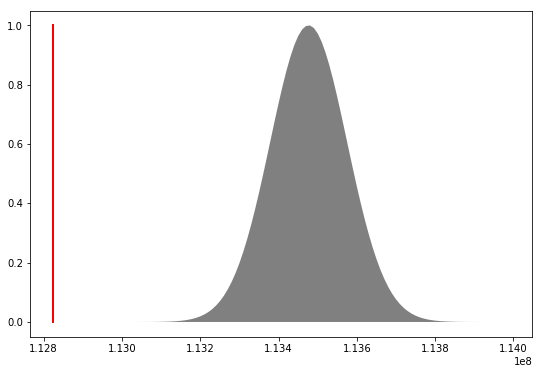

In [3]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#

ds = [14.,169.,3059.,149721.,369543.,802016.]
pm1s = [8145060.,678756.,36696.,732.,300.,144.]

# Stirlings formual for log(N!), valid for N large
def logfac(N):
    fN = float(N)
    return fN*mt.log(fN) + mt.log(2*mt.pi*fN)/2 - fN + \
      (fN**-1)/12 - (fN**-3)/360 + (fN**-5)/1260 - (fN**-7)/1680 + (fN**-9)/1188

def logp(n): # here we evaluate Stirlings formula for log of factorial n
    res = 0.
    for pm1,d in zip(pm1s,ds):
        res += logfac(n) - logfac(n-d)
        res += (n-d)*mt.log((pm1-1.)/pm1)
    return res

ns=range(113000000,114000000,10000)
y = np.zeros(len(ns))
for i in range(0,len(y)):
    y[i] = logp(ns[i])

xave = np.dot(ds,pm1s)/len(ds)
fig = plt.figure(figsize=(9,6))
plt.plot([xave,xave],[0.,1.],'r',lw=2.0)
plt.fill(ns,np.exp(y-y.max()),facecolor='grey')
plt.show()



**Task 3**  
Repeat the problem using the Maximum Likelihood (ML) approach. This
    is done by finding the value of $n$ which maximises the 
    likelihood. Since the prior is a
    constant for this problem the likelihood is proportional to the
    curve you produced in part 2. You could probably do it visually.
    Plot the average estimate you obtained in part 1 on top of the curve
    from part 2. How does the ML solution compare to the Bayesian solution and the Frequentist solution?

 Average of simple frequentist estimates of number of tickets 112823774.0
 Maximum Likelihood of estimates of number of tickets 113480000


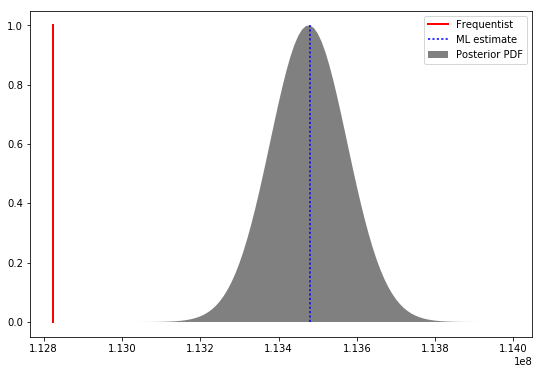

In [4]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#
print(' Average of simple frequentist estimates of number of tickets',xave) 
print(' Maximum Likelihood of estimates of number of tickets',ns[np.argmax(y)]) 

fig = plt.figure(figsize=(9,6))
plt.plot([xave,xave],[0.,1.],'r',lw=2.0,label='Frequentist')
plt.plot([ns[np.argmax(y)],ns[np.argmax(y)]],[0.,1.],'b:',label='ML estimate')
plt.fill(ns,np.exp(y-y.max()),facecolor='grey',label='Posterior PDF')
plt.legend()
plt.show()